In [1]:
import pandas as pd
import numpy as np 

In [2]:
df = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\project\section2_porject_210222\winemag-data-130k-v2.csv", index_col=0)

In [4]:
title_lists = df["title"].tolist()

In [3]:
df["winery"].describe()

count                 129971
unique                 16757
top       Wines & Winemakers
freq                     222
Name: winery, dtype: object

In [17]:
df

,variety,winery,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety_x,winery_x,winery_y,variety_y
0,White Blend,Nicosia,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000656,2360
12551,White Blend,Nicosia,Italy,"A delicate floral fragrance of white flower, p...",Fondo Filara Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Fondo Filara Bianco (Etna),White Blend,Nicosia,0.000656,2360
52317,White Blend,Nicosia,Italy,A blend of Carricante and Catarratto (two of S...,Fondo Filara,87,19.0,Sicily & Sardinia,Etna,NaN,NaN,NaN,Nicosia 2010 Fondo Filara (Etna),White Blend,Nicosia,0.000656,2360
12546,White Blend,Masseria Setteporte,Italy,"Aromas of Spanish broom, acacia and white tree...",N'ettaro Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2013 N'ettaro Bianco (Etna),White Blend,Masseria Setteporte,0.000179,2360
22,White Blend,Baglio di Pianetto,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,0.001074,2360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101010,Premsal,Terra de Falanis,Spain,Buttery oak aromas cover up any white-fruit ch...,Bla Bla Bla,83,15.0,Spanish Islands,Vi de la Terra Mallorca,NaN,Michael Schachner,@wineschach,Terra de Falanis 2012 Bla Bla Bla Premsal (Vi ...,Premsal,Terra de Falanis,0.000060,1
113067,Babosa Negro,Suertes del Marqués,Spain,Have you ever tried varietal Baboso Negro from...,Los Pasitos,92,45.0,Spanish Islands,NaN,NaN,Michael Schachner,@wineschach,Suertes del Marqués 2015 Los Pasitos Babosa Negro,Babosa Negro,Suertes del Marqués,0.000298,1
105149,Centesimino,Villa Venti,Italy,Made with rare native grape Centesimino (organ...,A,92,36.0,Italy Other,Vino da Tavola,NaN,Kerin O’Keefe,@kerinokeefe,Villa Venti 2015 A Centesimino (Vino da Tavola),Centesimino,Villa Venti,0.000060,1
119787,Otskhanuri Sapere,Amiran Vepkhvadze,NaN,This deep red-violet wine has a nose of blackb...,NaN,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Amiran Vepkhvadze 2014 Otskhanuri Sapere,Otskhanuri Sapere,Amiran Vepkhvadze,0.000060,1


In [19]:
df["province"].describe()

count         129907
unique           425
top       California
freq           36247
Name: province, dtype: object

<AxesSubplot:>

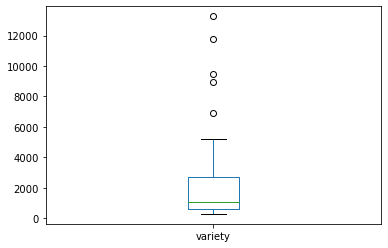

In [8]:
df['variety'].value_counts().head(50).plot(kind="box")

In [5]:
import re

In [4]:
df["winery"].isnull().sum()

0

In [9]:
df.shape

(129971, 15)

In [7]:
year_wine = []
for list in title_lists :
    test = re.findall("\d+", list)
    for i in test:
        if int(i) > 2002 :
            df["year"] = int(i)
        else :
            df["year"] = 0

In [5]:
winery_count = pd.DataFrame(df["winery"].value_counts())
winery_count["winery"] = winery_count["winery"]/len(winery_count["winery"])
winery_count

,winery
Wines & Winemakers,0.013248
Testarossa,0.013009
DFJ Vinhos,0.012830
Williams Selyem,0.012592
Louis Latour,0.011876
...,...
Marquis Philips,0.000060
Stanger,0.000060
Pierpaolo Pecorari,0.000060
Daniel Barraud,0.000060


In [14]:
#df1.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

In [6]:
df1.shape

(129971, 14)

In [22]:
df.head(50)

,variety,winery,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety_x,winery_x,winery_y,variety_y
0,White Blend,Nicosia,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000656,2360
12551,White Blend,Nicosia,Italy,"A delicate floral fragrance of white flower, p...",Fondo Filara Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Fondo Filara Bianco (Etna),White Blend,Nicosia,0.000656,2360
52317,White Blend,Nicosia,Italy,A blend of Carricante and Catarratto (two of S...,Fondo Filara,87,19.0,Sicily & Sardinia,Etna,NaN,NaN,NaN,Nicosia 2010 Fondo Filara (Etna),White Blend,Nicosia,0.000656,2360
12546,White Blend,Masseria Setteporte,Italy,"Aromas of Spanish broom, acacia and white tree...",N'ettaro Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2013 N'ettaro Bianco (Etna),White Blend,Masseria Setteporte,0.000179,2360
22,White Blend,Baglio di Pianetto,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,0.001074,2360
76833,White Blend,Baglio di Pianetto,Italy,"A blend of 70% Inzolia and 30% Viognier, this ...",Ficiligno,87,NaN,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2015 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,0.001074,2360
123206,White Blend,Baglio di Pianetto,Italy,This luminous blend of Insolia and Viognier of...,Ficiligno,86,14.0,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Baglio di Pianetto 2010 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,0.001074,2360
26,White Blend,Stemmari,Italy,Pretty aromas of yellow flower and stone fruit...,Dalila,87,13.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2013 Dalila White (Terre Siciliane),White Blend,Stemmari,0.001373,2360
22394,White Blend,Stemmari,Italy,"A blend of 80% Grillo and 20% Viognier, this c...",Dalila,87,14.0,Sicily & Sardinia,Terre Siciliane,NaN,Kerin O’Keefe,@kerinokeefe,Stemmari 2012 Dalila White (Terre Siciliane),White Blend,Stemmari,0.001373,2360
32,White Blend,Duca di Salaparuta,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta,0.002387,2360


In [6]:
# data wrangling을 통한 카테고리데이터 점수화 
df = pd.merge(df, winery_count, left_on="winery", right_index=True)
df

,winery,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery_x,winery_y
0,Nicosia,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000656
9959,Nicosia,Italy,"Aromas of toasted oak, mint, vanilla and dried...",Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2011 Rosso (Etna),Red Blend,Nicosia,0.000656
12551,Nicosia,Italy,"A delicate floral fragrance of white flower, p...",Fondo Filara Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Fondo Filara Bianco (Etna),White Blend,Nicosia,0.000656
31875,Nicosia,Italy,Fondo Filara is a blend of Nero d'Avola and Fr...,Fondo Filara,87,19.0,Sicily & Sardinia,Cerasuolo di Vittoria Classico,NaN,NaN,NaN,Nicosia 2009 Fondo Filara (Cerasuolo di Vitto...,Red Blend,Nicosia,0.000656
31876,Nicosia,Italy,Fondo Filara offers an authentic taste of Etna...,Fondo Filara,87,19.0,Sicily & Sardinia,Etna,NaN,NaN,NaN,Nicosia 2009 Fondo Filara (Etna),Red Blend,Nicosia,0.000656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129741,Cardinal Rule,US,"Light in color and delicate in texture, this w...",NaN,90,36.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Cardinal Rule 2014 Pinot Noir (Russian River V...,Pinot Noir,Cardinal Rule,0.000060
129753,Flagstone,South Africa,"Soft scents of just-dried hay, yellow apple an...",The Rumor Mill,87,18.0,Western Cape,NaN,NaN,Lauren Buzzeo,@laurbuzz,Flagstone 2012 The Rumor Mill Viognier (Wester...,Viognier,Flagstone,0.000060
129761,Mas de Pampelonne,France,"Close to the beach of Pampelonne, this is a an...",NaN,87,18.0,Provence,Côtes de Provence,NaN,Roger Voss,@vossroger,Mas de Pampelonne 2013 Rosé (Côtes de Provence),Rosé,Mas de Pampelonne,0.000060
129856,Bodegas Eidosela,Spain,Lime and grapefruit aromas are a touch pithy a...,Ethereo,90,15.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Bodegas Eidosela 2015 Ethereo Albariño (Rías B...,Albariño,Bodegas Eidosela,0.000060


In [15]:
df1["description"] = df1["description"].str.split(" ")

NameError: name 'df1' is not defined

In [7]:
df['variety'].describe()

count         129970
unique           707
top       Pinot Noir
freq           13272
Name: variety, dtype: object

In [ ]:
lists = df1["description"].tolist()

all_list = []
for list in lists:
    for item in list:
        all_list.append(item)

In [ ]:
counts = {}


for list in all_list :
    counts[list] = counts.get(list, 0) + 1

In [ ]:
{k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

In [13]:
df['region'] = df.title.str.split('(').str[1]
df['region'] = df.region.str.split(')').str[0]
df['region']

0                                   Etna
9959                                Etna
12551                               Etna
31875     Cerasuolo di Vittoria Classico
31876                               Etna
                       ...              
129741              Russian River Valley
129753                      Western Cape
129761                 Côtes de Provence
129856                       Rías Baixas
129890                     Luján de Cuyo
Name: region, Length: 129971, dtype: object

In [10]:
df['variety'].value_counts().head(50)

Pinot Noir                       13272
Chardonnay                       11753
Cabernet Sauvignon                9472
Red Blend                         8946
Bordeaux-style Red Blend          6915
Riesling                          5189
Sauvignon Blanc                   4967
Syrah                             4142
Rosé                              3564
Merlot                            3102
Nebbiolo                          2804
Zinfandel                         2714
Sangiovese                        2707
Malbec                            2652
Portuguese Red                    2466
White Blend                       2360
Sparkling Blend                   2153
Tempranillo                       1810
Rhône-style Red Blend             1471
Pinot Gris                        1455
Champagne Blend                   1396
Cabernet Franc                    1353
Grüner Veltliner                  1345
Portuguese White                  1159
Bordeaux-style White Blend        1066
Pinot Grigio             

In [ ]:
df1["country"].isnull().sum()

카테고리티가 너무 높기 때문에 이를 이대로 인코더를 통해 학습을 진행할 경우 문제가 feature가 너무나 많아지게 된다. 이에, 해결하기 위해 아래와 같이 2가지를 고민하였다.   

1. 구간별로 그룹을 지어 카테고리별로 분리를 할 것인지
2. count / len로 각 카테고리별 점수표를 만들어서 가중치를 줄것인지

1번을 선택할 경우, 그룹을 나누는 기준을 선정하는 것이 매우 모호하다  
수량으로 기준을 나누자니 아래 variety_point에서 관찰되듯 variety_count가 높다고 무조건 max score가 높은 것도 아니며, 평균이 높은 것도 아니다. 이에, 2번 방법으로 각 카테코리별 점수표를 만들어 가중치를 주고자 한다. 

In [ ]:
df1['country'].dropna()

In [14]:
df = pd.DataFrame(df1["variety"].value_counts())

410

In [16]:
winery_count[winery_count["variety"] > 100 ].plot.hist()

KeyError: 'variety'

In [11]:
variety_point = df.groupby(['variety']).points.agg([len, min, max, sum])
variety_point["mean"] = variety_point["sum"]/variety_point["len"]
variety_point.sort_values(by="len", ascending=False)

,len,min,max,sum,mean
variety,,,,,
Pinot Noir,13272,80,99,1186669,89.411468
Chardonnay,11753,80,100,1038261,88.340083
Cabernet Sauvignon,9472,80,100,839291,88.607580
Red Blend,8946,80,99,790650,88.380282
Bordeaux-style Red Blend,6915,80,100,616171,89.106435
...,...,...,...,...,...
Tempranillo-Malbec,1,91,91,91,91.000000
Malbec-Carménère,1,91,91,91,91.000000
Malagouzia-Chardonnay,1,86,86,86,86.000000


In [ ]:
df1["points"].isnull().sum()

In [12]:
variety_count = pd.DataFrame(df["variety"].value_counts())
variety_count

,variety
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Karalahna,1
Vital,1
Bobal-Cabernet Sauvignon,1
Morava,1


In [ ]:
df1.corr()

In [13]:
# variety를 카운트하여 해당 카테고리를 인트로 변환하여 주었다. 
# 추후 scaler를 통하여 해당 값들은 조정해줄 예정이다. 
df = pd.merge(df, variety_count, left_on="variety", right_index=True)

In [ ]:
df1.head(2)

In [16]:
df

,variety,winery,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety_x,winery_x,winery_y,variety_y
0,White Blend,Nicosia,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,0.000656,2360
12551,White Blend,Nicosia,Italy,"A delicate floral fragrance of white flower, p...",Fondo Filara Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Fondo Filara Bianco (Etna),White Blend,Nicosia,0.000656,2360
52317,White Blend,Nicosia,Italy,A blend of Carricante and Catarratto (two of S...,Fondo Filara,87,19.0,Sicily & Sardinia,Etna,NaN,NaN,NaN,Nicosia 2010 Fondo Filara (Etna),White Blend,Nicosia,0.000656,2360
12546,White Blend,Masseria Setteporte,Italy,"Aromas of Spanish broom, acacia and white tree...",N'ettaro Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2013 N'ettaro Bianco (Etna),White Blend,Masseria Setteporte,0.000179,2360
22,White Blend,Baglio di Pianetto,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto,0.001074,2360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101010,Premsal,Terra de Falanis,Spain,Buttery oak aromas cover up any white-fruit ch...,Bla Bla Bla,83,15.0,Spanish Islands,Vi de la Terra Mallorca,NaN,Michael Schachner,@wineschach,Terra de Falanis 2012 Bla Bla Bla Premsal (Vi ...,Premsal,Terra de Falanis,0.000060,1
113067,Babosa Negro,Suertes del Marqués,Spain,Have you ever tried varietal Baboso Negro from...,Los Pasitos,92,45.0,Spanish Islands,NaN,NaN,Michael Schachner,@wineschach,Suertes del Marqués 2015 Los Pasitos Babosa Negro,Babosa Negro,Suertes del Marqués,0.000298,1
105149,Centesimino,Villa Venti,Italy,Made with rare native grape Centesimino (organ...,A,92,36.0,Italy Other,Vino da Tavola,NaN,Kerin O’Keefe,@kerinokeefe,Villa Venti 2015 A Centesimino (Vino da Tavola),Centesimino,Villa Venti,0.000060,1
119787,Otskhanuri Sapere,Amiran Vepkhvadze,NaN,This deep red-violet wine has a nose of blackb...,NaN,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Amiran Vepkhvadze 2014 Otskhanuri Sapere,Otskhanuri Sapere,Amiran Vepkhvadze,0.000060,1


In [ ]:
df1

In [26]:
lists

[['Aromas',
  'include',
  'tropical',
  'fruit,',
  'broom,',
  'brimstone',
  'and',
  'dried',
  'herb.',
  'The',
  'palate',
  "isn't",
  'overly',
  'expressive,',
  'offering',
  'unripened',
  'apple,',
  'citrus',
  'and',
  'dried',
  'sage',
  'alongside',
  'brisk',
  'acidity.'],
 ['Aromas',
  'of',
  'toasted',
  'oak,',
  'mint,',
  'vanilla',
  'and',
  'dried',
  'berry',
  'lead',
  'the',
  'nose',
  'and',
  'continue',
  'to',
  'the',
  'palate',
  'along',
  'with',
  'coffee',
  'and',
  'anise',
  'notes.',
  "It's",
  'rather',
  'austere',
  'and',
  'lacks',
  'fruit',
  'richness.'],
 ['A',
  'delicate',
  'floral',
  'fragrance',
  'of',
  'white',
  'flower,',
  'pear,',
  'citrus,',
  'hay',
  'and',
  'a',
  'hint',
  'of',
  'beeswax',
  'and',
  'Mediterranean',
  'herb',
  'lead',
  'the',
  'nose.',
  'The',
  'palate',
  'is',
  'polished',
  'and',
  'bright,',
  'showing',
  'green',
  'apple,',
  'citrus',
  'and',
  'mineral',
  'alongside',
  

In [19]:
df1[['variety', "price"]].corr()

,price
price,1.0


In [18]:
df1

,winery,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery_x,year,winery_y,region
0,Nicosia,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2012,11,Etna
9959,Nicosia,Italy,"Aromas of toasted oak, mint, vanilla and dried...",Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2011 Rosso (Etna),Red Blend,Nicosia,2012,11,Etna
12551,Nicosia,Italy,"A delicate floral fragrance of white flower, p...",Fondo Filara Bianco,88,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Fondo Filara Bianco (Etna),White Blend,Nicosia,2012,11,Etna
31875,Nicosia,Italy,Fondo Filara is a blend of Nero d'Avola and Fr...,Fondo Filara,87,19.0,Sicily & Sardinia,Cerasuolo di Vittoria Classico,NaN,NaN,NaN,Nicosia 2009 Fondo Filara (Cerasuolo di Vitto...,Red Blend,Nicosia,2012,11,Cerasuolo di Vittoria Classico
31876,Nicosia,Italy,Fondo Filara offers an authentic taste of Etna...,Fondo Filara,87,19.0,Sicily & Sardinia,Etna,NaN,NaN,NaN,Nicosia 2009 Fondo Filara (Etna),Red Blend,Nicosia,2012,11,Etna
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129741,Cardinal Rule,US,"Light in color and delicate in texture, this w...",NaN,90,36.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Cardinal Rule 2014 Pinot Noir (Russian River V...,Pinot Noir,Cardinal Rule,2012,1,Russian River Valley
129753,Flagstone,South Africa,"Soft scents of just-dried hay, yellow apple an...",The Rumor Mill,87,18.0,Western Cape,NaN,NaN,Lauren Buzzeo,@laurbuzz,Flagstone 2012 The Rumor Mill Viognier (Wester...,Viognier,Flagstone,2012,1,Western Cape
129761,Mas de Pampelonne,France,"Close to the beach of Pampelonne, this is a an...",NaN,87,18.0,Provence,Côtes de Provence,NaN,Roger Voss,@vossroger,Mas de Pampelonne 2013 Rosé (Côtes de Provence),Rosé,Mas de Pampelonne,2012,1,Côtes de Provence
129856,Bodegas Eidosela,Spain,Lime and grapefruit aromas are a touch pithy a...,Ethereo,90,15.0,Galicia,Rías Baixas,NaN,Michael Schachner,@wineschach,Bodegas Eidosela 2015 Ethereo Albariño (Rías B...,Albariño,Bodegas Eidosela,2012,1,Rías Baixas


In [43]:
df1['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [29]:
sorted(counts.items(), key=lambda x: x[1])

[('Catarratto-based', 1),
 ('Euro-styled', 1),
 ('Chambourcin.', 1),
 ('bee-pollen', 1),
 ('brown-sugar-dusted', 1),
 ('“limited”', 1),
 ('Spending', 1),
 ('attention:', 1),
 ('minimalistic', 1),
 ('boneless', 1),
 ("Tandem's", 1),
 ('cinnamon-pepper,', 1),
 ('now–2012', 1),
 ('raisined.', 1),
 ('Giurfo', 1),
 ('Frappato.', 1),
 ('nose—there', 1),
 ('vim,', 1),
 ('loose.', 1),
 ('unflinching', 1),
 ('Hoard', 1),
 ('conifer.', 1),
 ("Trimbach's", 1),
 ('Hune', 1),
 ('Rosacker', 1),
 ('Riesling—crisp', 1),
 ('owe', 1),
 ('appetite-enhancing', 1),
 ('Tardives,', 1),
 ('strucutre.', 1),
 ('woftly.', 1),
 ('grace—thanks', 1),
 ('clean—autolysis', 1),
 ('1674,', 1),
 ('fruits—crisp,', 1),
 ('persist:', 1),
 ('igentle', 1),
 ('sprout', 1),
 ('palate-freshener', 1),
 ('pick-up.', 1),
 ('focussed,', 1),
 ('Letzenberg', 1),
 ('Lynch,', 1),
 ('blend—57%', 1),
 ('Franc—shows', 1),
 ('Châteauneuf-du-Pape?', 1),
 ('Amaretto.', 1),
 ('shadows,', 1),
 ('star—bold', 1),
 ("astringent—there's", 1),
 ('s

In [27]:
all_list = all_list.str.lower()

AttributeError: 'list' object has no attribute 'str'